# Credit Card Approval - Exploratory Data Analysis (EDA)
This notebook combines EDA from both approach_1 and approach_2

**Prerequisites:** All required packages must be installed first
```bash
pip install -r requirements.txt
```

**MLflow Tracking:** All visualizations and statistics are logged to MLflow

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from pathlib import Path

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


In [2]:
# Initialize MLflow
# End MLflow run
mlflow.end_run()
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("credit_card_approval_eda")
mlflow.start_run(run_name="eda_analysis")

print("✓ MLflow experiment started")

✓ MLflow experiment started


## 1. Data Loading

In [3]:
# Load datasets
app_data = pd.read_csv('../data/raw/application_record.csv')
credit_data = pd.read_csv('../data/raw/credit_record.csv')

print(f"📊 Application Records: {app_data.shape[0]:,} rows, {app_data.shape[1]} columns")
print(f"📊 Credit Records: {credit_data.shape[0]:,} rows, {credit_data.shape[1]} columns")
print(f"👥 Unique Applicants: {app_data['ID'].nunique():,}")
print(f"🔗 Common IDs: {len(set(app_data['ID']).intersection(set(credit_data['ID']))):,}")

# Log to MLflow
mlflow.log_param("app_records_count", app_data.shape[0])
mlflow.log_param("credit_records_count", credit_data.shape[0])
mlflow.log_param("unique_applicants", app_data['ID'].nunique())
mlflow.log_param("common_ids", len(set(app_data['ID']).intersection(set(credit_data['ID']))))

📊 Application Records: 438,557 rows, 18 columns
📊 Credit Records: 1,048,575 rows, 3 columns
👥 Unique Applicants: 438,510
🔗 Common IDs: 36,457


36457

In [4]:
# Display sample data
print("\n" + "="*80)
print("APPLICATION DATA SAMPLE")
print("="*80)
display(app_data.head())

print("\n" + "="*80)
print("CREDIT RECORD SAMPLE")
print("="*80)
display(credit_data.head(20))


APPLICATION DATA SAMPLE


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



CREDIT RECORD SAMPLE


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


## 2. Data Quality Check

In [5]:
print("="*80)
print("DATA QUALITY CHECK")
print("="*80)

print("\n📋 Credit Data Info:")
credit_data.info()

print("\n📋 Application Data Info:")
app_data.info()

print("\n🔍 Missing Values - Credit Data:")
print(credit_data.isnull().sum())

print("\n🔍 Missing Values - Application Data:")
missing_app = app_data.isnull().sum()
print(missing_app)

# Log missing values to MLflow
mlflow.log_metric("missing_occupation", missing_app['OCCUPATION_TYPE'])
mlflow.log_metric("missing_percentage_occupation", (missing_app['OCCUPATION_TYPE'] / len(app_data)) * 100)

DATA QUALITY CHECK

📋 Credit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB

📋 Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE 

## 3. Credit Status Distribution Analysis

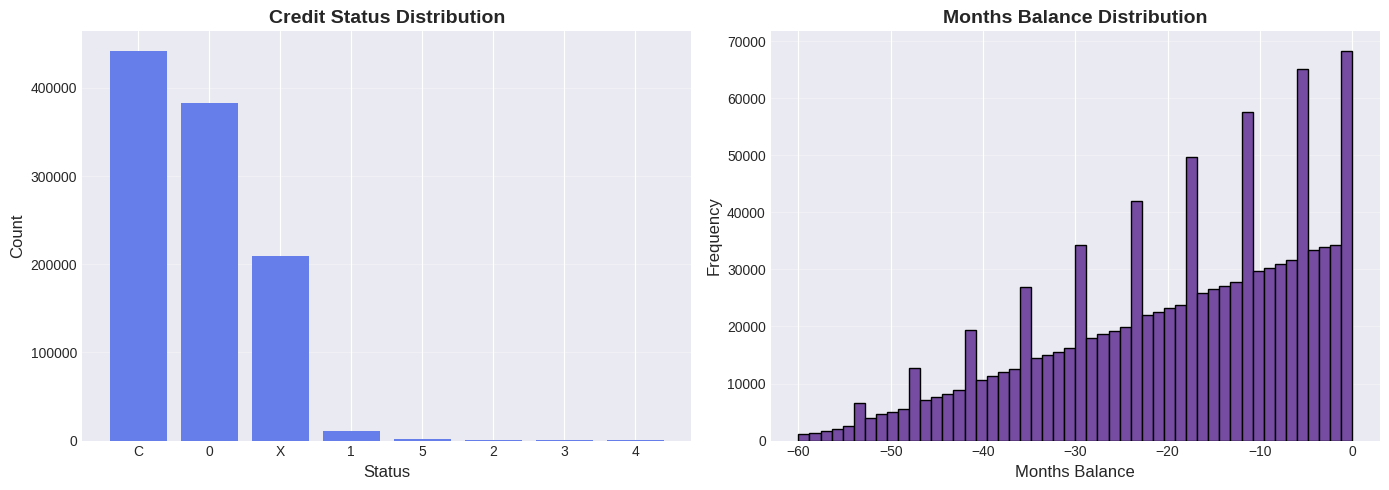


📊 Status Value Counts:
STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

📊 Months Balance Range: -60 to 0


In [6]:
# Visualize credit status distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Status counts
status_counts = credit_data['STATUS'].value_counts()
axes[0].bar(status_counts.index, status_counts.values, color='#667eea')
axes[0].set_xlabel('Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Credit Status Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# Months balance distribution
axes[1].hist(credit_data['MONTHS_BALANCE'], bins=50, color='#764ba2', edgecolor='black')
axes[1].set_xlabel('Months Balance', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Months Balance Distribution', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
mlflow.log_figure(fig, "credit_status_distribution.png")
plt.show()

print(f"\n📊 Status Value Counts:")
print(credit_data['STATUS'].value_counts())
print(f"\n📊 Months Balance Range: {credit_data['MONTHS_BALANCE'].min()} to {credit_data['MONTHS_BALANCE'].max()}")

## 4. Application Features Distribution

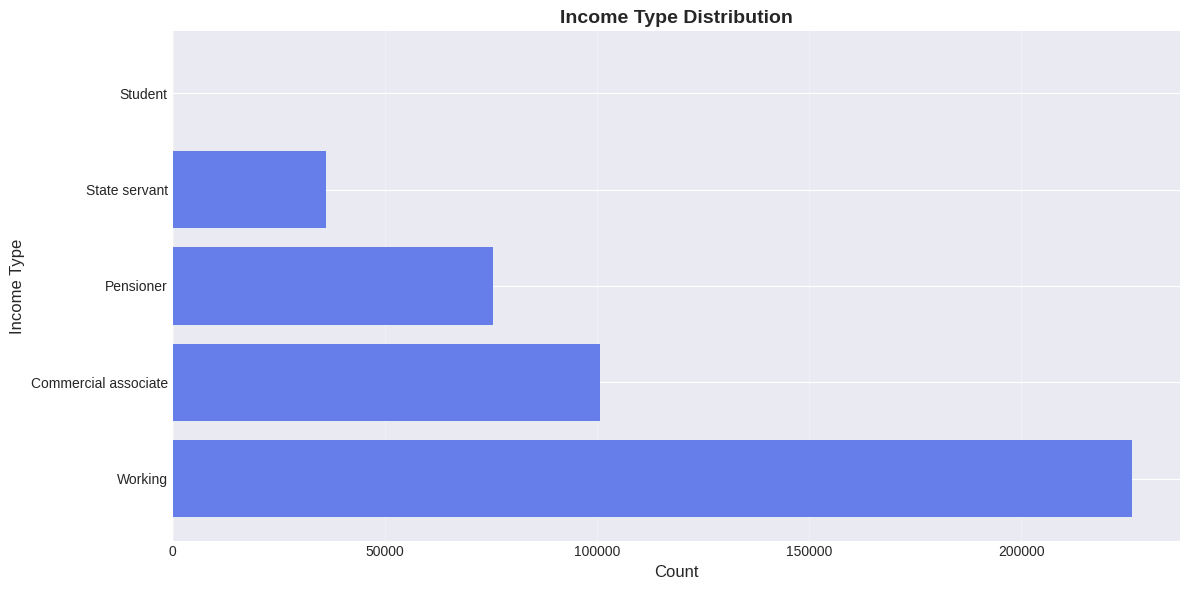

In [7]:
# Income type distribution
plt.figure(figsize=(12, 6))
income_counts = app_data['NAME_INCOME_TYPE'].value_counts()
plt.barh(income_counts.index, income_counts.values, color='#667eea')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Income Type', fontsize=12)
plt.title('Income Type Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
mlflow.log_figure(plt.gcf(), "income_type_distribution.png")
plt.show()

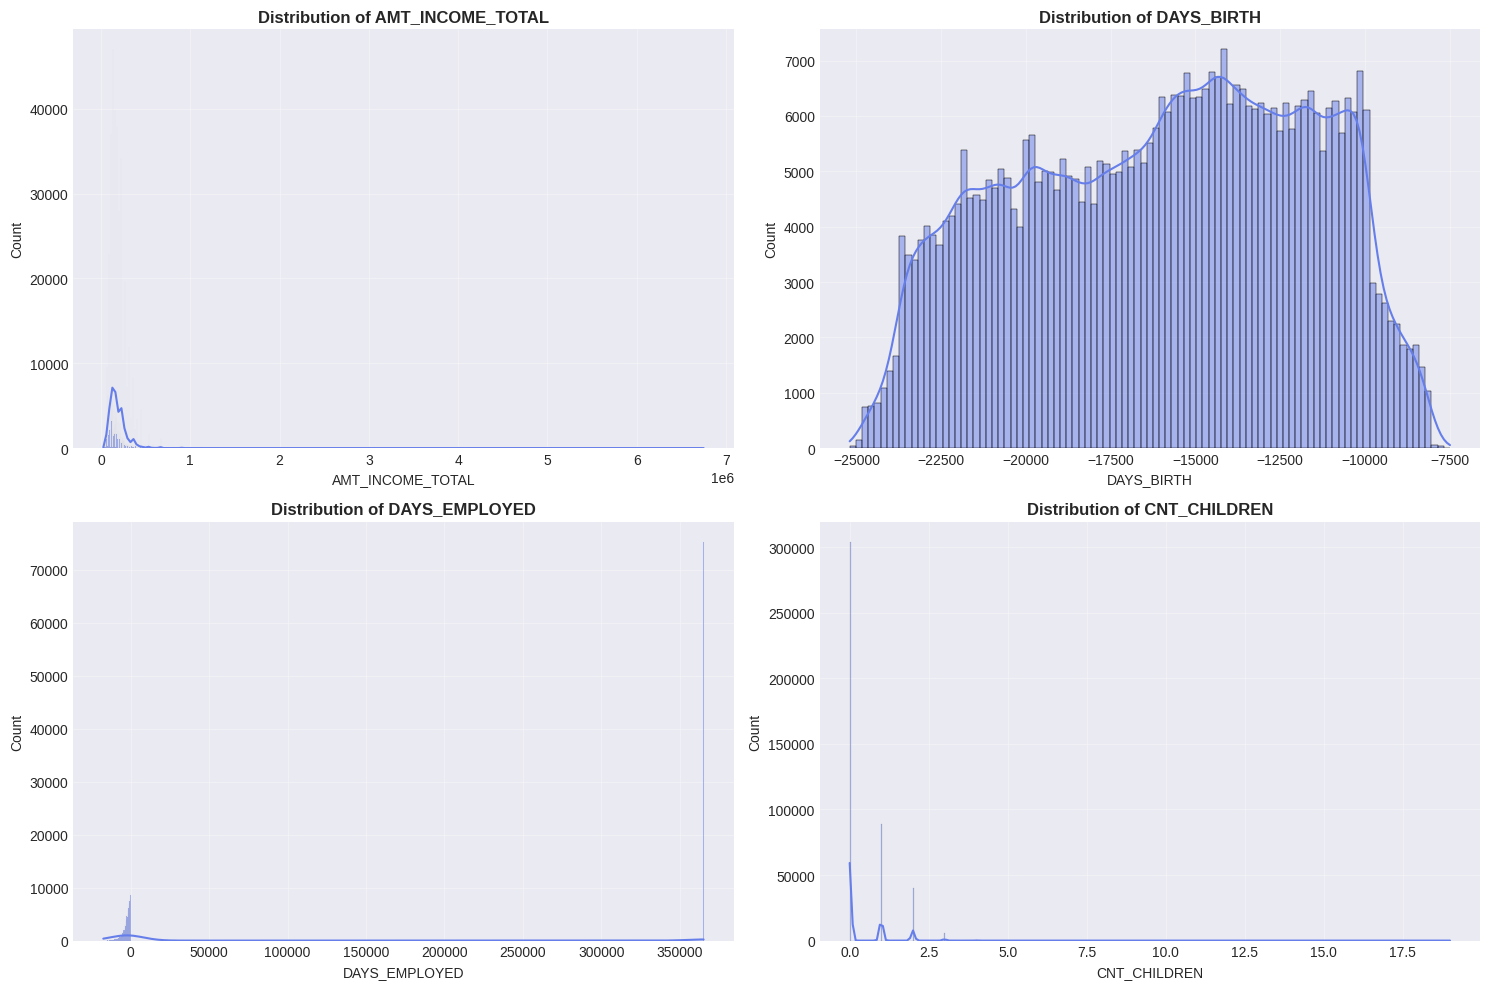

In [8]:
# Numerical features distribution
num_cols = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(app_data[col], kde=True, ax=axes[i], color='#667eea')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].grid(alpha=0.3)
    
plt.tight_layout()
mlflow.log_figure(fig, "numerical_features_distribution.png")
plt.show()

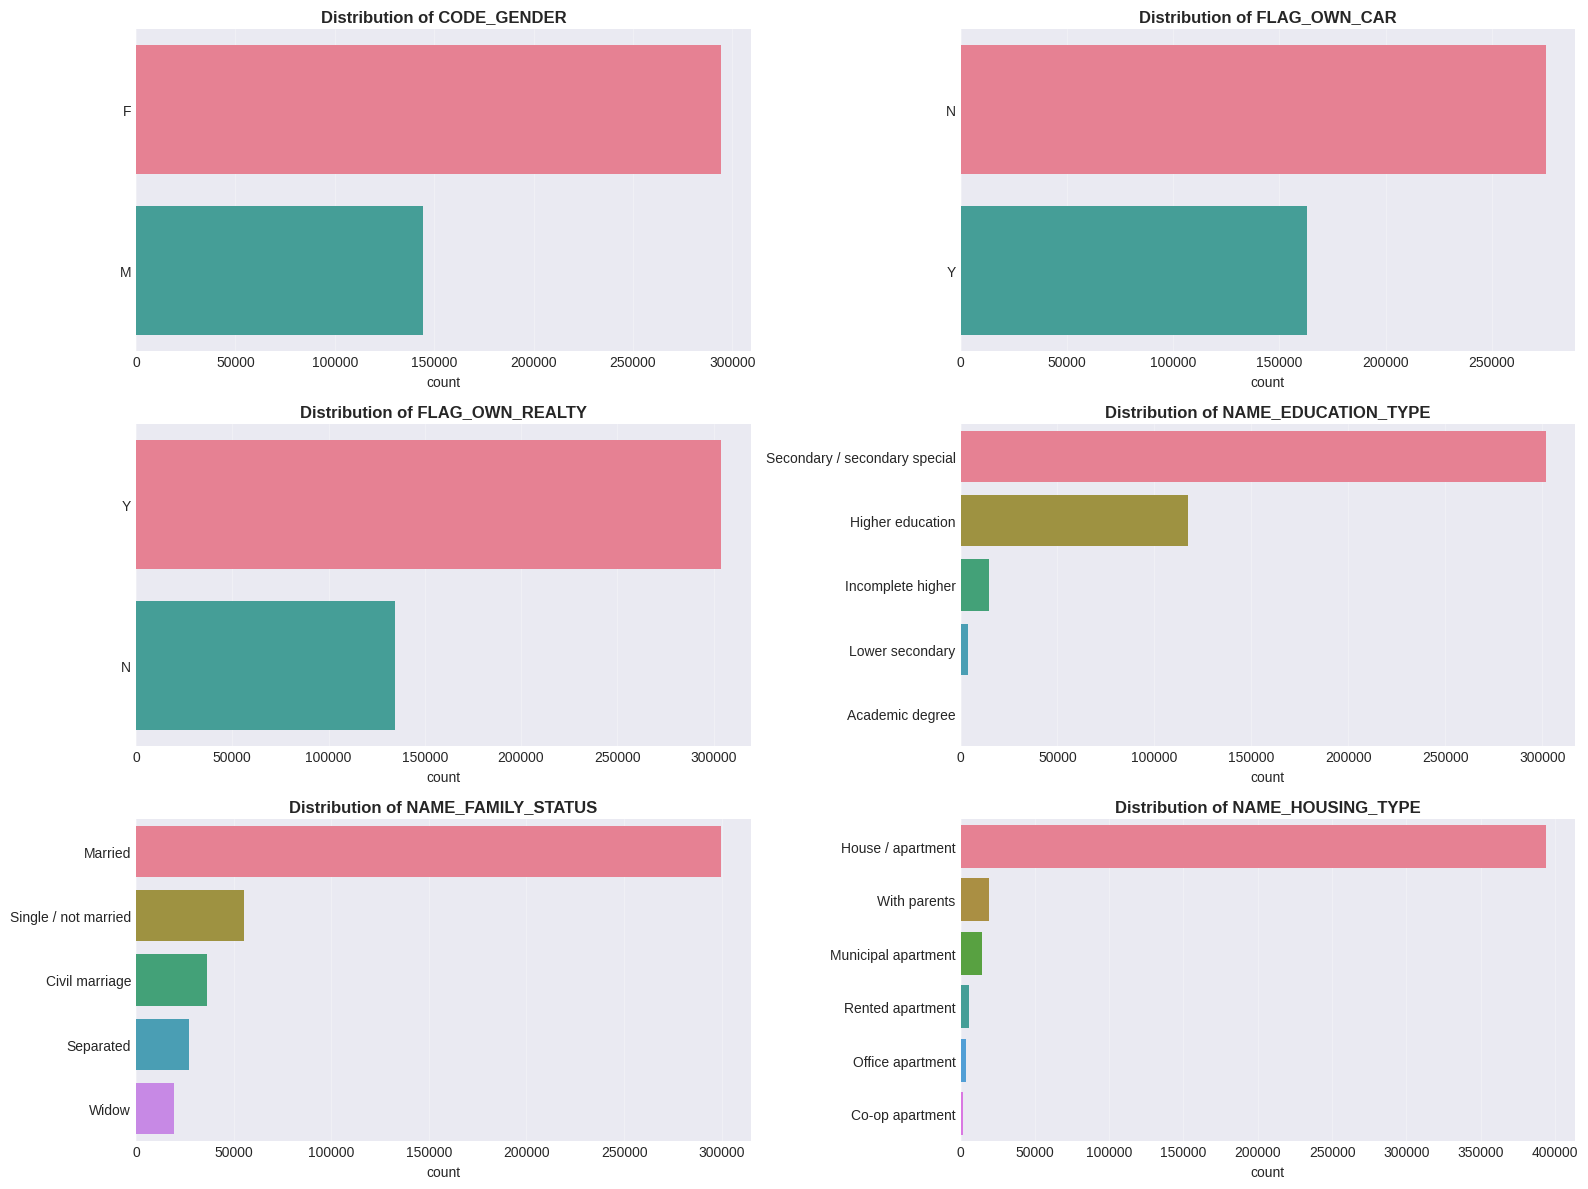

In [9]:
# Categorical features distribution
cat_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 
            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(y=app_data[col], ax=axes[i], order=app_data[col].value_counts().index,
                 palette='husl')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].set_ylabel('')
    axes[i].grid(alpha=0.3, axis='x')
    
plt.tight_layout()
mlflow.log_figure(fig, "categorical_features_distribution.png")
plt.show()

# Create Good/Bad labels from STATUS

In [10]:

# Status 2,3,4,5 = Bad (overdue), 0,X,C = Good
credit_data['Good or Bad'] = credit_data['STATUS'].apply(
    lambda x: 'Good' if x in ['0', 'X', 'C'] else 'Bad'
)

# Group by ID and get dominant label
credit_goods_bads = credit_data.groupby(['ID', 'Good or Bad']).size().to_frame('size')
credit_goods_bads.reset_index(inplace=True)

idx = credit_goods_bads.groupby('ID')['size'].idxmax()
max_goods_bads = credit_goods_bads.loc[idx]

# Convert to binary (1=Good, 0=Bad)
max_goods_bads['Label'] = max_goods_bads['Good or Bad'].apply(lambda x: 1 if x == 'Good' else 0)
max_goods_bads = max_goods_bads[['ID', 'Label']].reset_index(drop=True)

print(f"✓ Created target labels for {len(max_goods_bads):,} customers")
print(f"\nLabel Distribution:")
print(f"  Good (1): {(max_goods_bads['Label'] == 1).sum():,} ({(max_goods_bads['Label'] == 1).sum() / len(max_goods_bads) * 100:.1f}%)")
print(f"  Bad (0):  {(max_goods_bads['Label'] == 0).sum():,} ({(max_goods_bads['Label'] == 0).sum() / len(max_goods_bads) * 100:.1f}%)")

# Log to MLflow
mlflow.log_metric("good_credit_count", (max_goods_bads['Label'] == 1).sum())
mlflow.log_metric("bad_credit_count", (max_goods_bads['Label'] == 0).sum())
mlflow.log_metric("imbalance_ratio", (max_goods_bads['Label'] == 1).sum() / (max_goods_bads['Label'] == 0).sum())

✓ Created target labels for 45,985 customers

Label Distribution:
  Good (1): 45,800 (99.6%)
  Bad (0):  185 (0.4%)


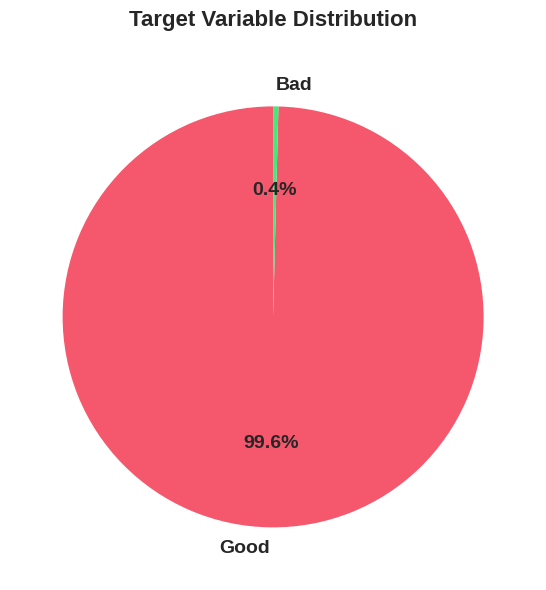

In [11]:
# Visualize target distribution
fig, ax = plt.subplots(figsize=(8, 6))
target_counts = max_goods_bads['Label'].value_counts()
colors = ['#f5576c', '#43e97b']
ax.pie(target_counts.values, labels=['Good', 'Bad'], autopct='%1.1f%%', 
       colors=colors, startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax.set_title('Target Variable Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
mlflow.log_figure(fig, "target_distribution.png")
plt.show()

## 6. Correlation Analysis

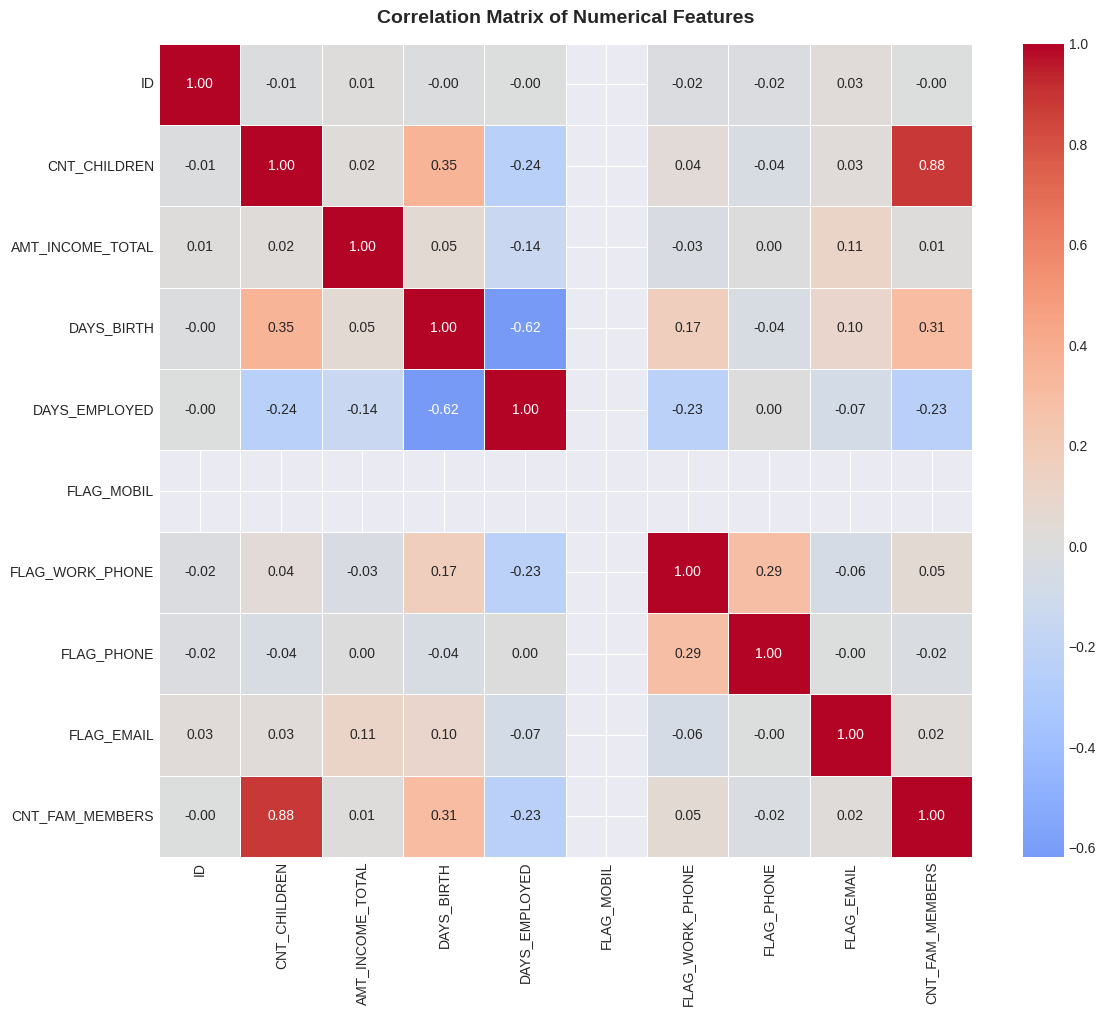

In [12]:
# Select numerical columns for correlation
num_cols = app_data.select_dtypes(include=['int64', 'float64']).columns
corr = app_data[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
mlflow.log_figure(plt.gcf(), "correlation_matrix.png")
plt.show()

In [13]:
print("="*80)
print("KEY EDA INSIGHTS")
print("="*80)

insights = [
    f"1. Dataset Size: {app_data.shape[0]:,} applications, {credit_data.shape[0]:,} credit records",
    f"2. Missing Data: OCCUPATION_TYPE has {app_data['OCCUPATION_TYPE'].isnull().sum():,} missing values ({app_data['OCCUPATION_TYPE'].isnull().sum()/len(app_data)*100:.1f}%)",
    f"3. Gender Distribution: Female ({(app_data['CODE_GENDER'] == 'F').sum() / len(app_data) * 100:.1f}%) vs Male ({(app_data['CODE_GENDER'] == 'M').sum() / len(app_data) * 100:.1f}%)",
    f"4. Car Ownership: {(app_data['FLAG_OWN_CAR'] == 'Y').sum() / len(app_data) * 100:.1f}% own a car",
    f"5. Realty Ownership: {(app_data['FLAG_OWN_REALTY'] == 'Y').sum() / len(app_data) * 100:.1f}% own realty",
    f"6. Common IDs between Application and Credit: {len(set(app_data['ID']).intersection(set(credit_data['ID']))):,}"
]

for insight in insights:
    print(f"  {insight}")

# Log insights to MLflow
mlflow.log_text("\n".join(insights), "eda_insights.txt")

KEY EDA INSIGHTS
  1. Dataset Size: 438,557 applications, 1,048,575 credit records
  2. Missing Data: OCCUPATION_TYPE has 134,203 missing values (30.6%)
  3. Gender Distribution: Female (67.1%) vs Male (32.9%)
  4. Car Ownership: 37.2% own a car
  5. Realty Ownership: 69.3% own realty
  6. Common IDs between Application and Credit: 36,457


In [14]:
# Display summary statistics
print("="*80)
print("SUMMARY STATISTICS - NUMERICAL FEATURES")
print("="*80)
display(app_data.describe())

print("\n" + "="*80)
print("SUMMARY STATISTICS - CATEGORICAL FEATURES")
print("="*80)
display(app_data.describe(include=['object']))

SUMMARY STATISTICS - NUMERICAL FEATURES


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000



SUMMARY STATISTICS - CATEGORICAL FEATURES


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


## 8. Key Insights

In [15]:
print("="*80)
print("KEY EDA INSIGHTS")
print("="*80)

insights = [
    f"1. Dataset Size: {app_data.shape[0]:,} applications, {credit_data.shape[0]:,} credit records",
    f"2. Missing Data: OCCUPATION_TYPE has {app_data['OCCUPATION_TYPE'].isnull().sum():,} missing values ({app_data['OCCUPATION_TYPE'].isnull().sum()/len(app_data)*100:.1f}%)",
    f"3. Class Imbalance: Good credits ({(max_goods_bads['Label'] == 1).sum() / len(max_goods_bads) * 100:.1f}%) vs Bad credits ({(max_goods_bads['Label'] == 0).sum() / len(max_goods_bads) * 100:.1f}%)",
    f"4. Gender Distribution: Female ({(app_data['CODE_GENDER'] == 'F').sum() / len(app_data) * 100:.1f}%) vs Male ({(app_data['CODE_GENDER'] == 'M').sum() / len(app_data) * 100:.1f}%)",
    f"5. Car Ownership: {(app_data['FLAG_OWN_CAR'] == 'Y').sum() / len(app_data) * 100:.1f}% own a car",
    f"6. Realty Ownership: {(app_data['FLAG_OWN_REALTY'] == 'Y').sum() / len(app_data) * 100:.1f}% own realty",
]

for insight in insights:
    print(f"  {insight}")

# Log insights to MLflow
mlflow.log_text("\n".join(insights), "eda_insights.txt")

KEY EDA INSIGHTS
  1. Dataset Size: 438,557 applications, 1,048,575 credit records
  2. Missing Data: OCCUPATION_TYPE has 134,203 missing values (30.6%)
  3. Class Imbalance: Good credits (99.6%) vs Bad credits (0.4%)
  4. Gender Distribution: Female (67.1%) vs Male (32.9%)
  5. Car Ownership: 37.2% own a car
  6. Realty Ownership: 69.3% own realty


In [16]:
# End MLflow run
mlflow.end_run()
print("\n✅ EDA completed and logged to MLflow")

🏃 View run eda_analysis at: http://127.0.0.1:5000/#/experiments/1/runs/4c39cf4dfe7a426c935f5e834e26877d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1

✅ EDA completed and logged to MLflow
